# Proyecto Final de Aprendizaje Automático: Clasificador de Agua Potable

Por Miguel Ferreras Chumillas y Antonio Rodríguez Hurtado

## Introducción

Nuestro proyecto final para la asignatura Aprendizaje Automático y Big Data consiste en un clasificador que, dados unos datos sobre el agua que deseemos analizar, evalúa y decide si es potable o no. Para ello, hemos utilizado varios de los modelos aprendidos en la asignatura, comparándolos con el fin de obtener el modelo que mayor eficacia muestre.

Para el entrenamiento de los modelos, hemos utilizado un dataset proveniente de la plataforma web Kaggle con la composición de distintas muestras de agua, y si éstas son provenientes de agua potable o no. A continuación, veremos el dataset con más detalle.

## Obtención de Datos y Tratamiento

### Análisis de los Datos

Los datos sobre la potabilidad del agua están guardados en un archivo con formato csv, por lo que hemos utilizado la librería Pandas de Python para facilitar su extracción y posterior tratamiento y uso. Como se puede ver a continuación, los datos están clasificados según nueve características o atributos distintos, más un atributo adicional que nos indica si el agua es potable o no.

In [16]:
datos = pd.read_csv("water_potability.csv")
datos.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [13]:
datos.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


Sin embargo, no todos los datos están completos; en algunos de ellos falta información sobre uno o varios de los atributos:

In [18]:
datos.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Por tanto, es algo que deberemos tratar más adelante si queremos que nuestros modelos se entrenen con la mayor efectividad posible.

Pero ese no es el único problema de nuestro dataset actual. Si observamos la proporción entre los casos en los que el agua es potable y en los que no, observamos que están descompensados, habiendo mayor casos de agua no potable que de agua potable. Esta desproporción puede hacer que nuestros modelos posean cierto sesgo, por lo que es necesario corregirla más adelante.

In [20]:
datos.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

<AxesSubplot:ylabel='Potability'>

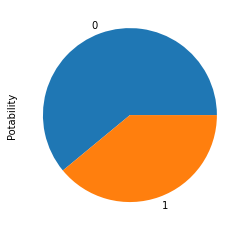

In [22]:
datos.Potability.value_counts().plot(kind='pie')

### Tratamiento de Datos

Lo primero que haremos será corregir los problemas que hemos descubierto. En primer lugar, trataremos los valores nulos dentro de nuestro dataset.

Debido a que la potabilidad del agua es un dato determinante, hemos preferido no tratar los datos con valores nulos de la forma habitual, es decir, asignándole la media global a cada uno de los atributos que faltan. En su lugar, hemos optado por descartar aquellos datos con atributos vacíos, haciendo que el conjunto de datos se reduzca pero asegurándonos de que todos los datos sean válidos.

In [26]:
datos = datos.dropna()
datos.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [28]:
datos.Potability.value_counts()

0    1200
1     811
Name: Potability, dtype: int64

<AxesSubplot:ylabel='Potability'>

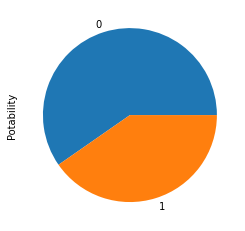

In [29]:
datos.Potability.value_counts().plot(kind='pie')

Como podemos observar, pese a que hemos eliminado parte de los datos la desproporción se mantiene, por lo que es necesario tratarla para alcanzar un equilibrio entre los datos con agua potable y con agua no potable.

Para ello, crearemos nuevos datos a partir de los ya existentes hasta alcanzar dicho equilibrio, de la siguiente forma:

<AxesSubplot:ylabel='Potability'>

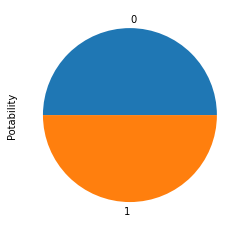

In [30]:
zero  = datos[datos['Potability']==0]  
one = datos[datos['Potability']==1] 

df_minority_upsampled = resample(one, replace = True, n_samples = 1200) 

datos = pd.concat([zero, df_minority_upsampled])
datos = shuffle(datos) 

datos.Potability.value_counts().plot(kind='pie')

Nuestros datos ya están listos para utilizarse, por lo que ya tan solo queda dividirlos en los diferentes conjuntos de datos que vayamos a usar en nuestros modelos.

In [31]:
X = datos.drop(['Potability'], axis = 1)
y = datos['Potability']

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features= X.columns
X[features] = sc.fit_transform(X[features])

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=1)

## Modelos del Clasificador

# Apéndice: Código

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from IPython.display import clear_output
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Funciones para regresion logistica

In [78]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def hip(X, theta):
    return sigmoid(np.dot(X, theta))

def cost(theta, X, Y, m, lamda):
    return (-1 / m) * (np.dot(Y, np.log(hip(X, theta))) + np.dot((1 - Y), np.log(1 - hip(X, theta)))) + (lamda / (2 * m)) * np.sum(np.power(theta, 2))               

def gradient(theta, X, Y, m, lamda):
    gradiente =  ((1 / m) * np.matmul((hip(X, theta) - Y), X))
    result = gradiente[0]
    i = 1
    for e in gradiente[1:]:
        result = np.append(result, e + ((lamda / m) * theta[i]))
        i += 1
    return result


def regresion_logistica(x_train, y_train, x_test, y_test):
    lamda = 0.1
    theta = [0] * (9)
    result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(x_train, y_train, np.shape(x_train)[0], lamda))
    theta_opt = result[0]

    
    au_under_dwayn(y_test, hip(x_test,theta_opt), 'Regresion logistica')
    print(classification_report(y_test,hip(x_test,theta_opt).round()))
    
    

No Skill : ROC AUC=0.500
Regresion logistica : ROC AUC=0.483


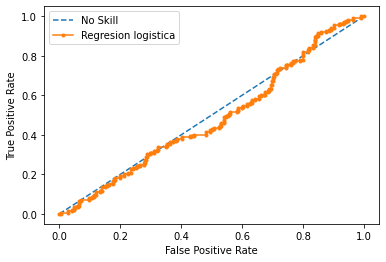

              precision    recall  f1-score   support

           0       0.45      0.49      0.47       235
           1       0.47      0.43      0.45       245

    accuracy                           0.46       480
   macro avg       0.46      0.46      0.46       480
weighted avg       0.46      0.46      0.46       480



In [80]:
regresion_logistica(x_train, y_train, x_test, y_test)

# Funciones para kernel svm

0.7895833333333333 100.0 %
No Skill : ROC AUC=0.500
Kernel rbf : ROC AUC=0.821


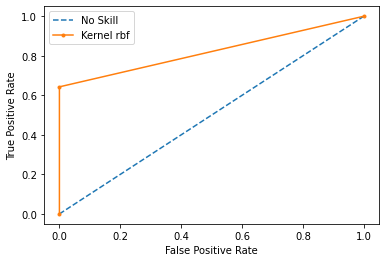

              precision    recall  f1-score   support

           0       0.76      1.00      0.86       256
           1       1.00      0.64      0.78       224

    accuracy                           0.83       480
   macro avg       0.88      0.82      0.82       480
weighted avg       0.87      0.83      0.83       480



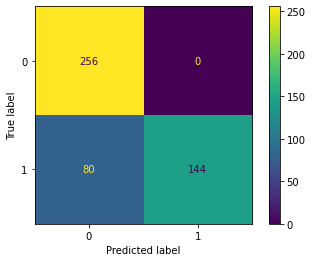

In [12]:
def kernel_rbf(x_train, y_train, x_test, y_test):
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2
    
    values = np.linspace(0.1,100, 10, dtype=float)
    best_C = 0
    best_sigma = 0
    best_acc = 0
    i = 0
    for C in values:
        for sigma in values:
            i = i+1
            svm = SVC(kernel='rbf', C=C, gamma=1 / (2 * sigma**2))
            svm.fit(x_train, y_train)
            acc = accuracy_score(y_val, svm.predict(x_val))
            clear_output(wait=True)
            if acc > best_acc:
                best_C = C
                best_sigma = sigma
                best_acc = acc
            print(best_acc, i * 100/len(values)**2, '%')
    return best_C, best_sigma

best_C, best_sigma = kernel_rbf(x_train, y_train, x_test, y_test)
svm = SVC(kernel='rbf', C=best_C, gamma=1 / (2 * best_sigma**2), probability=True)
svm.fit(x_train, y_train)
y_score = svm.decision_function(x_test)

au_under_dwayn(y_test, svm.predict(x_test), 'Kernel rbf')
print(classification_report(y_test,np.where(y_score > 0, 1, 0)))

cm = confusion_matrix(y_test, np.where(y_score > 0, 1, 0))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot()

# The fucking neural network

In [162]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten


In [165]:
def neural(x_train, y_train):
    
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(2, activation='sigmoid'))
    
    model.compile(optimizer= 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train ,steps_per_epoch=len(x_train) / 32, epochs=100)

    return model

In [166]:
model = neural(x_train, y_train)
pre_test = model.predict(x_test)

Epoch 1/100
60/60 [==============================] - 0s 578us/step - loss: 0.6903 - accuracy: 0.5301
Epoch 2/100
60/60 [==============================] - 0s 497us/step - loss: 0.6245 - accuracy: 0.6774
Epoch 3/100
60/60 [==============================] - 0s 439us/step - loss: 0.5875 - accuracy: 0.7051
Epoch 4/100
60/60 [==============================] - 0s 473us/step - loss: 0.5683 - accuracy: 0.7054
Epoch 5/100
60/60 [==============================] - 0s 487us/step - loss: 0.5435 - accuracy: 0.7246
Epoch 6/100
60/60 [==============================] - 0s 467us/step - loss: 0.5280 - accuracy: 0.7406
Epoch 7/100
60/60 [==============================] - ETA: 0s - loss: 0.5735 - accuracy: 0.65 - 0s 462us/step - loss: 0.5218 - accuracy: 0.7326
Epoch 8/100
60/60 [==============================] - 0s 462us/step - loss: 0.5012 - accuracy: 0.7533
Epoch 9/100
60/60 [==============================] - 0s 490us/step - loss: 0.4921 - accuracy: 0.7732
Epoch 10/100
60/60 [=============================

Epoch 81/100
60/60 [==============================] - 0s 440us/step - loss: 0.0348 - accuracy: 0.9999
Epoch 82/100
60/60 [==============================] - 0s 439us/step - loss: 0.0353 - accuracy: 0.9990
Epoch 83/100
60/60 [==============================] - 0s 456us/step - loss: 0.0321 - accuracy: 0.9990
Epoch 84/100
60/60 [==============================] - 0s 501us/step - loss: 0.0309 - accuracy: 0.9997
Epoch 85/100
60/60 [==============================] - 0s 465us/step - loss: 0.0332 - accuracy: 0.9994
Epoch 86/100
60/60 [==============================] - 0s 456us/step - loss: 0.0285 - accuracy: 0.9989
Epoch 87/100
60/60 [==============================] - 0s 439us/step - loss: 0.0285 - accuracy: 0.9986
Epoch 88/100
60/60 [==============================] - 0s 541us/step - loss: 0.0266 - accuracy: 0.9992
Epoch 89/100
60/60 [==============================] - 0s 439us/step - loss: 0.0239 - accuracy: 1.0000
Epoch 90/100
60/60 [==============================] - 0s 456us/step - loss: 0.0247

In [167]:
z = []
for e in pre_test:
    if e[0] > e[1]:
        z.append(0)
    else:
        z.append(1)

No Skill : ROC AUC=0.500
Red neuronal : ROC AUC=0.589


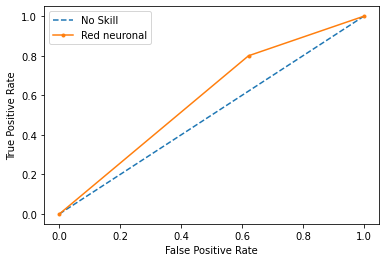

              precision    recall  f1-score   support

           0       0.64      0.38      0.48       235
           1       0.57      0.80      0.67       245

    accuracy                           0.59       480
   macro avg       0.61      0.59      0.57       480
weighted avg       0.61      0.59      0.57       480



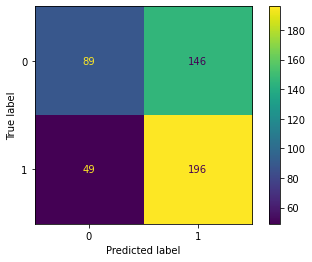

In [85]:
au_under_dwayn(y_test, z, 'Red neuronal')
print(classification_report(y_test,z))

cm = confusion_matrix(y_test, z)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot()

In [158]:
y_onehot = np.zeros((np.shape(x_train)[0], 2))
for i in range(np.shape(x_train)[0]):
    y_onehot[i][y_train.iloc[i]] = 1.0

#-------------------------------------------------------
#   Definimos la funcion sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#   Defininmos la funcion de hipotesis
def hip(a, b):
    return sigmoid(np.matmul(a, b))

#   Definimos la funcion de propagacion hacia adelante
def forward_propagate(X, Theta1, Theta2):
    m = X.shape[0]
    A1 = np.hstack([np.ones([m, 1]), X])
    Z2 = np.dot(A1, Theta1.T)
    A2 = np.hstack([np.ones([m, 1]), sigmoid(Z2)])
    Z3 = np.dot(A2, Theta2.T)
    H = sigmoid(Z3)
    return A1, Z2, A2, Z3, H

def cost(H, Y, Theta1, Theta2, reg):
    m = len(Y)
    th1 = np.delete(Theta1, 0, axis=1)
    th2 = np.delete(Theta2, 0, axis=1)
    suma = 0
    for i in range(m):
        suma += np.sum((np.matmul(-Y[i,:], np.log(H[i,:])) - np.matmul((1 - Y[i,:]), np.log(1 - H[i,:]))))
    return ((1 / m) * suma) + ((reg / (2 * m)) * (np.sum(np.power(th1, 2)) + np.sum(np.power(th2, 2))))


def cash_converter(H):
    x = []
    for e in H:
        if e[0] > e[1]:
            x.append(0)
        else:
            x.append(1)
    return x

def backprop(params_rn, num_entradas, num_ocultas, num_etiquetas, X, y, reg):
    m = X.shape[0]
    Theta1 = np.reshape(params_rn[:num_ocultas * (num_entradas + 1)], (num_ocultas, (num_entradas + 1)))
    Theta2 = np.reshape(params_rn[num_ocultas * (num_entradas + 1):], (num_etiquetas, (num_ocultas + 1)))
    A1, Z2, A2, Z3, H = forward_propagate(X, Theta1, Theta2)
    #Llamada a la funcion para calcular el coste

    coste = cost(H, y, Theta1, Theta2, reg)

    #Back-propagation
    Delta1, Delta2 = np.zeros(Theta1.shape), np.zeros(Theta2.shape)
    sigma3 = (H - y)
    Delta2 += np.dot(sigma3.T, A2)
    Delta1 += np.dot(np.delete(np.dot(sigma3, Theta2) * (A2 * (1 - A2)), 0, axis=1).T, A1)
    D1 = Delta1 / m
    D2 = Delta2 / m
    #Regularizacion del gradiente
    D1[:, 1:] = D1[:, 1:] + (reg * Theta1[:, 1:]) / m
    D2[:, 1:] = D2[:, 1:] + (reg * Theta2[:, 1:]) / m
       
    return coste, np.concatenate((D1, D2), axis=None)


def pesosAleatorios(L_in, L_out):
    ini_epsilon = 0.12
    theta = np.random.rand(L_out, 1 + L_in) * (2*ini_epsilon) - ini_epsilon 
    return theta 

def train(X, y, reg, iters):
    num_entradas = X.shape[1]
    num_ocultas = 64
    num_etiquetas = 2

    theta1 = pesosAleatorios(num_entradas, num_ocultas)
    theta2 = pesosAleatorios(num_ocultas, num_etiquetas)
    params = np.concatenate((np.ravel(theta1), np.ravel(theta2)))

    fmin = opt.minimize(fun=backprop, x0=params, 
                 args=(num_entradas, num_ocultas, num_etiquetas, X, y, reg),
                 method='TNC', jac=True, options={'maxiter' : iters})

    theta1 = np.reshape(fmin.x[:num_ocultas * (num_entradas + 1)],
                       (num_ocultas, (num_entradas + 1)))
    theta2 = np.reshape(fmin.x[num_ocultas * (num_entradas + 1):],
                       (num_etiquetas, (num_ocultas + 1)))
    
    return theta1, theta2

def predictions(X, theta1, theta2):
    a1, z2, a2, z2, h = forward_propagate(X, theta1, theta2)
    predictions = np.argmax(h, axis=1)
    return predictions


In [159]:
theta1, theta2 = train(x_train, y_onehot, reg=0.5, iters=100)
pre = predictions(x_test, theta1, theta2)

No Skill : ROC AUC=0.500
Red neuronal : ROC AUC=0.658


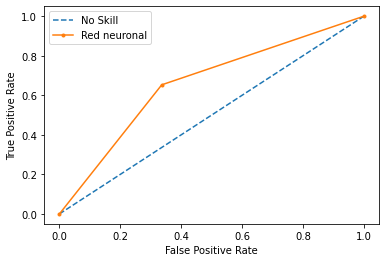

              precision    recall  f1-score   support

           0       0.65      0.66      0.66       235
           1       0.67      0.65      0.66       245

    accuracy                           0.66       480
   macro avg       0.66      0.66      0.66       480
weighted avg       0.66      0.66      0.66       480



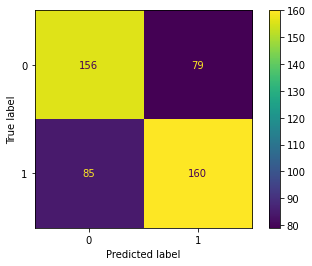

In [161]:
au_under_dwayn(y_test, pre, 'Red neuronal')
print(classification_report(y_test,pre))
cm = confusion_matrix(y_test, pre)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Otras funciones necesarias para la practica

In [2]:
def au_under_dwayn(y_test, lr_probs, model):
    
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]
    # keep probabilities for the positive outcome only
    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)
    # summarize scores
    print('No Skill : ROC AUC=%.3f' % (ns_auc))
    print(model,': ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    # plot the roc curve for the model
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label=model)
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()
    
    




# Recogida y manejo de datos

In [36]:
# Cargamos los datos
datos = pd.read_csv("water_potability.csv")
datos.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [37]:
datos.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [38]:
datos = datos.dropna()

<AxesSubplot:ylabel='Potability'>

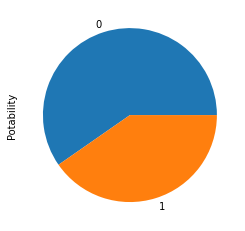

In [39]:
datos.Potability.value_counts().plot(kind='pie')

<AxesSubplot:ylabel='Potability'>

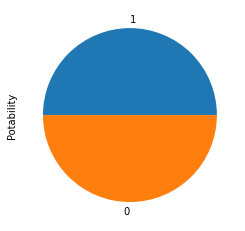

In [40]:
zero  = datos[datos['Potability']==0]  
one = datos[datos['Potability']==1] 

df_minority_upsampled = resample(one, replace = True, n_samples = 1200) 

datos = pd.concat([zero, df_minority_upsampled])
datos = shuffle(datos) 

datos.Potability.value_counts().plot(kind='pie')

In [41]:
X = datos.drop(['Potability'], axis = 1)
y = datos['Potability']

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features= X.columns
X[features] = sc.fit_transform(X[features])



x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=1)

ox_train = np.hstack([np.ones([np.shape(x_train)[0],1]),x_train])
ox_test = np.hstack([np.ones([np.shape(x_test)[0],1]),x_test])